In [21]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw



In [22]:
def visualize_graph(G):
    # Visualization enhancement
    plt.figure(figsize=(14, 10))
    # Using spring layout; k adjusts the distance between nodes.
    pos = nx.spring_layout(G, k=1, iterations=500)

    # Draw nodes and edges with improved aesthetics
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color="#6BAED6", edgecolors="black", linewidths=1.5)
    nx.draw_networkx_edges(G, pos, edge_color="#CCCCCC")

    # Draw custom labels for better clarity
    # for node, (x, y) in pos.items():
    #     plt.text(x, y, node, fontsize=5, ha='center', va='center')

    plt.title("Model Dependency Network", fontsize=16)
    plt.axis("off")  # Turn off the axis
    plt.tight_layout()
    plt.show()

In [23]:
def degree_distribution(G):
    # Plotting degree distribution
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees)+2), align='left', rwidth=0.8)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.show()

    # Finding nodes with top 10 degree
    sorted_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
    print("Nodes with top 10 degrees:")
    for node, degree in sorted_nodes:
        print(f"Node {node} - Degree {degree}")

In [24]:
def is_powerlaw(G):
    degrees = [d for n, d in G.degree()]
    fit = powerlaw.Fit(degrees)
    print(f"Alpha (scaling exponent) = {fit.alpha}")
    print(f"Comparing the fit with other distributions:")
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    print(f"Loglikelihood ratio between power-law and exponential: R = {R}, p = {p}")


# Model to Model Networks

1. sees to be a power-law distribution -> suggest the growth machenism
2. the top 5 popular models: t5-small, bigcode/santacoder, t5-base, Salesforce/codet5-base, bigcode/starcoder
3. Top 5 nodes with highest Betweenness Centrality: t5-base, t5-small, Salesforce/codet5-base, SEBIS/code_trans_t5_base_transfer_learning_pretrain, t5-large
4. clustering value is 0, meaning no clustering.



In [25]:

model_to_model_file_path = 'data/model_dependency.csv'

# Create a directed graph
M_Graph = nx.Graph()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    print(f"Headers: {headers}\n")
    
    # Process each row
    for row in csv_reader:
        if row[3] != '2':
            # not a code model
            continue
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        M_Graph.add_node(model_name)
        M_Graph.add_node(parent_name)
        M_Graph.add_edge(parent_name, model_name)

Headers: ['Model Name', 'Parent_Model', 'Type', 'Is code model', 'plausible', '']



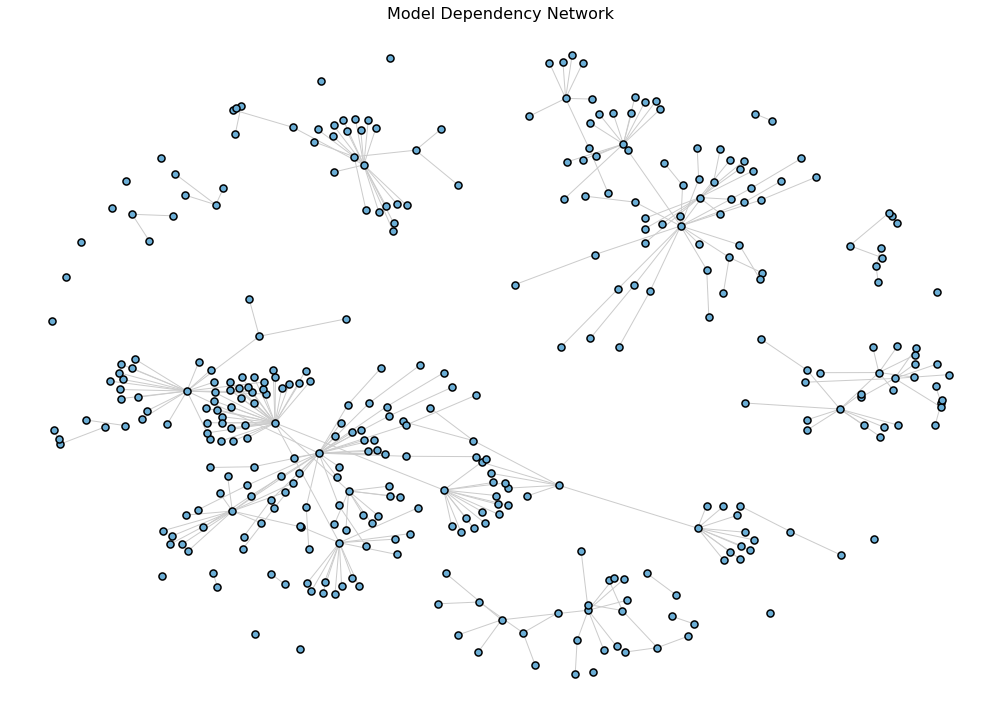

In [26]:
visualize_graph(M_Graph)

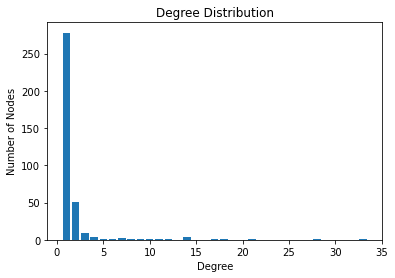

Nodes with top 10 degrees:
Node t5-small - Degree 33
Node t5-base - Degree 28
Node Salesforce/codet5-base - Degree 21
Node bigcode/starcoder - Degree 18
Node t5-large - Degree 17
Node SEBIS/code_trans_t5_base_transfer_learning_pretrain - Degree 14
Node SEBIS/code_trans_t5_large_transfer_learning_pretrain - Degree 14
Node SEBIS/code_trans_t5_small_api_generation_multitask - Degree 14
Node SEBIS/code_trans_t5_small_transfer_learning_pretrain - Degree 14
Node bigcode/santacoder - Degree 12


In [27]:
degree_distribution(M_Graph)

In [28]:
is_powerlaw(M_Graph)

Calculating best minimal value for power law fit
Alpha (scaling exponent) = 3.0695153622239664
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 6.363315517730658, p = 1.9744450899355296e-10


# Data-to-Data network

In [29]:

data_to_data_file_path = 'data/data-data_dependency.csv'

# Create a directed graph
D_Graph = nx.Graph()

# Read the CSV file
with open(data_to_data_file_path, mode='r', encoding='ISO-8859-1') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    print(f"Headers: {headers}\n")
    
    # Process each row
    for row in csv_reader:
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        D_Graph.add_node(model_name)
        D_Graph.add_node(parent_name)
        D_Graph.add_edge(parent_name, model_name)

Headers: ['model1', 'model2', 'description', '', '', '']



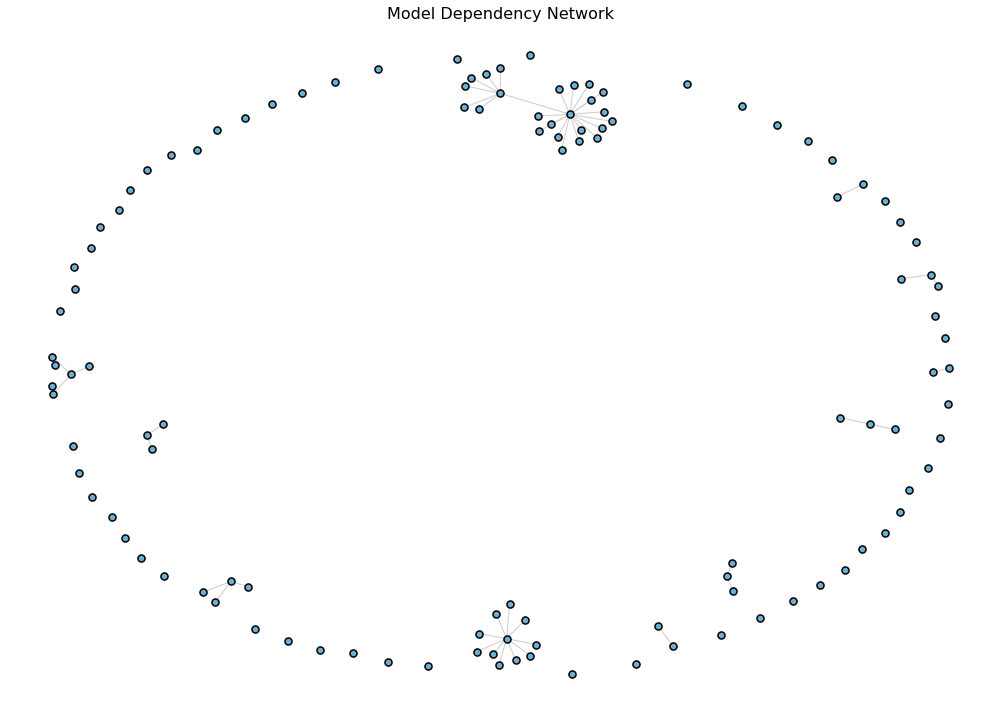

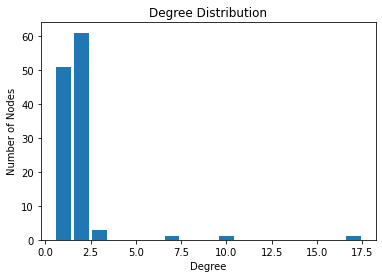

Nodes with top 10 degrees:
Node codexglue - Degree 17
Node codealpaca - Degree 10
Node code_x_glue_ct_code_to_text - Degree 7
Node the Pile - Degree 3
Node codeparrot/codeparrot-clean - Degree 3
Node irds/codesearchnet - Degree 3
Node yahma/alpaca-cleaned - Degree 2
Node commitgen - Degree 2
Node bigcode/the-stack - Degree 2
Node codeparrot/github-code - Degree 2


In [30]:
visualize_graph(D_Graph)
degree_distribution(D_Graph)

In [31]:
is_powerlaw(D_Graph)

Calculating best minimal value for power law fit
Alpha (scaling exponent) = 11.774021168392364
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 5.782624526285176, p = 7.35440906211823e-09


# Model-Data Dependency

In [32]:

model_to_model_file_path = 'data/model_data_dependency.csv'

# Create a directed graph
MD_Graph = nx.Graph()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    
    # Process each row
    for row in csv_reader:
        if row[2] != '2':
            # not a code model
            continue
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        MD_Graph.add_node(model_name)
        MD_Graph.add_node(parent_name)
        MD_Graph.add_edge(parent_name, model_name)

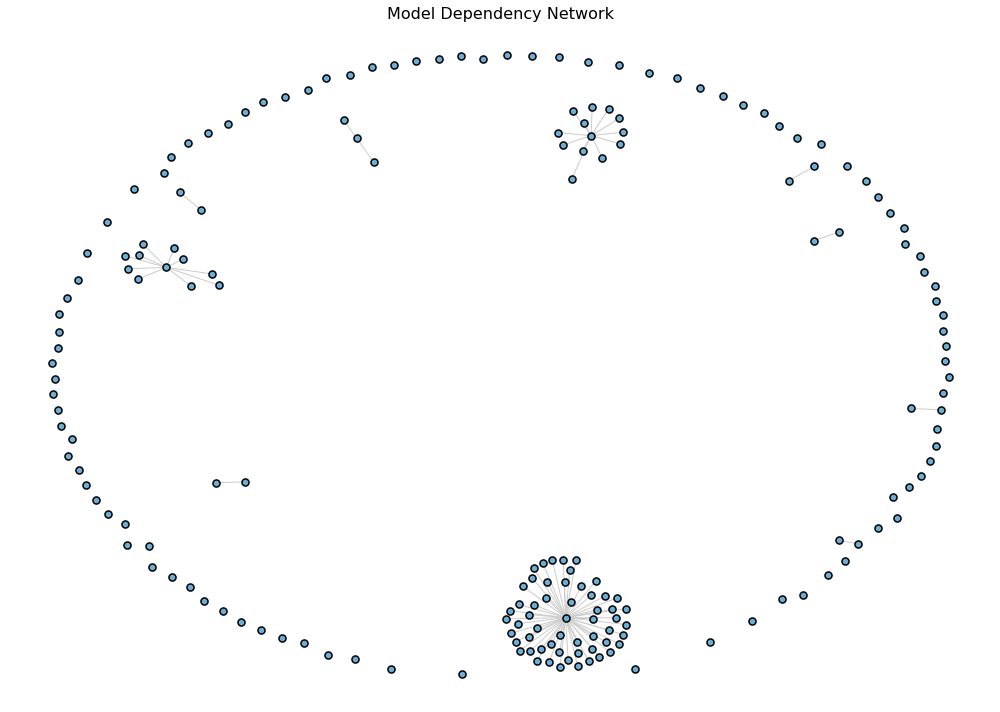

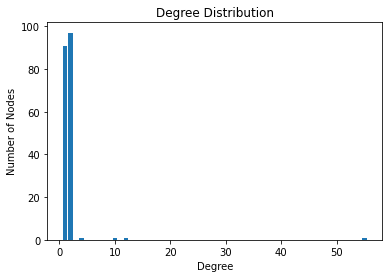

Nodes with top 10 degrees:
Node SEBIS - Degree 55
Node external-dataset - Degree 12
Node code_search_net - Degree 10
Node transformersbook/codeparrot - Degree 4
Node SEBIS/code_trans_t5_large_api_generation_transfer_learning_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_multitask - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_multitask_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_transfer_learning_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_documentation_generation_go_multitask - Degree 2
Node SEBIS/code_trans_t5_large_code_documentation_generation_go_multitask_finetune - Degree 2
Calculating best minimal value for power law fit
Alpha (scaling exponent) = 14.632932885682262
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 4.90902906206237, p = 9.152841508283517e-07


NameError: name 'clustering_coefficient' is not defined

In [33]:
visualize_graph(MD_Graph)
degree_distribution(MD_Graph)
is_powerlaw(MD_Graph)
clustering_coefficient(MD_Graph)
betweenness(MD_Graph)

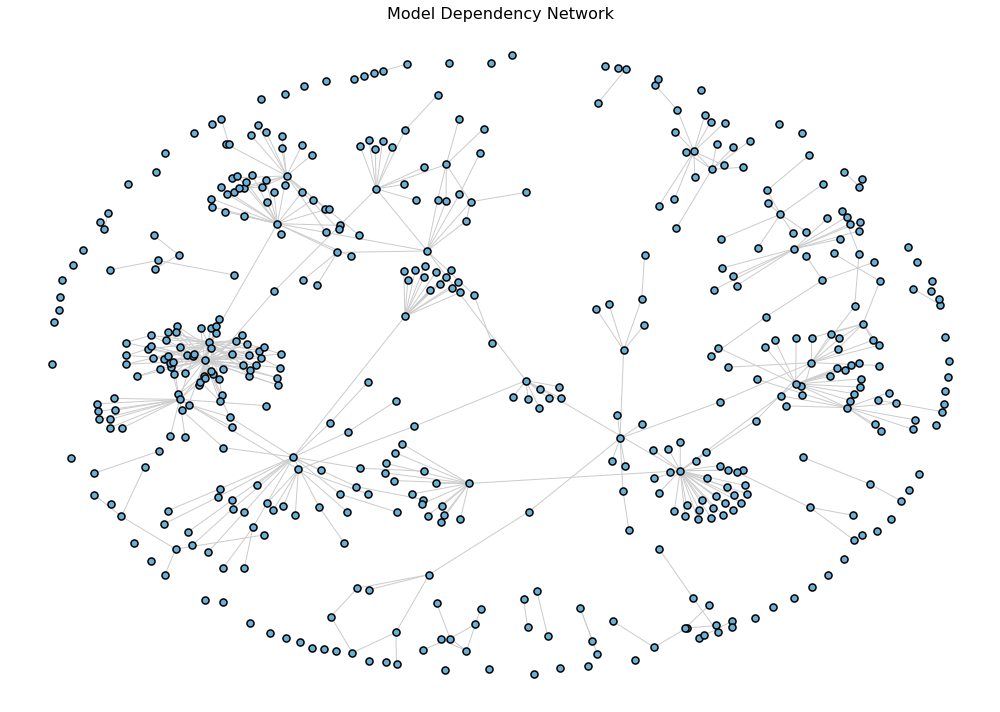

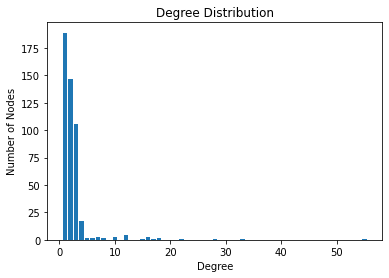

Nodes with top 10 degrees:
Node SEBIS - Degree 55
Node t5-small - Degree 33
Node t5-base - Degree 28
Node Salesforce/codet5-base - Degree 22
Node bigcode/starcoder - Degree 18
Node codexglue - Degree 18
Node t5-large - Degree 17
Node SEBIS/code_trans_t5_large_transfer_learning_pretrain - Degree 16
Node SEBIS/code_trans_t5_small_api_generation_multitask - Degree 16
Node SEBIS/code_trans_t5_small_transfer_learning_pretrain - Degree 16
Calculating best minimal value for power law fit
Alpha (scaling exponent) = 4.534292035936407
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 6.904745775750447, p = 5.029341265603616e-12


NameError: name 'clustering_coefficient' is not defined

In [ ]:
U_Graph = nx.compose(M_Graph, D_Graph)
U_Graph = nx.compose(U_Graph, MD_Graph)
visualize_graph(U_Graph)
degree_distribution(U_Graph)
is_powerlaw(U_Graph)
clustering_coefficient(U_Graph)
betweenness(U_Graph)

# Author network

In [ ]:
A_network = nx.Graph()

for node in U_Graph.nodes():
    try:
        owner, asset = node.split('/')
    except ValueError:
        continue
        owner, asset = 'HF', node
    A_network.add_edge(owner, asset)


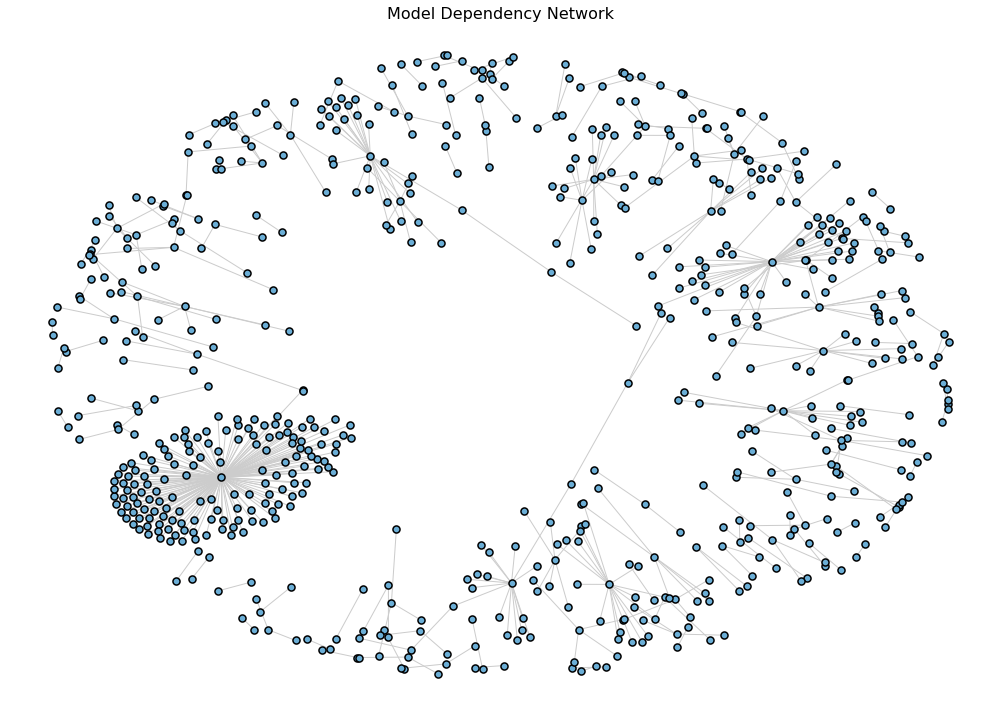

In [ ]:
visualize_graph(A_network)

In [34]:
degree_distribution(A_network)

NameError: name 'A_network' is not defined

In [35]:
is_powerlaw(A_network)

NameError: name 'A_network' is not defined

# Metrics Analysis

In [37]:
from huggingface_api import HuggingFaceAPI
import yaml
with open('config.yaml') as f:
    config = yaml.load(f)

api_key = config['huggingface_key']
hf_api = HuggingFaceAPI(api_key)

<ipython-input-37-e007795ebc0c>:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [45]:
# get model information


model_to_model_file_path = 'data/model_dependency.csv'

model_set = set()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    # Process each row
    for row in csv_reader:
        if row[3] == '2':
            model_name = row[0]
            model_set.add(model_name)

In [46]:
import json

# information path 
model_info_path = 'data/model_detail_dict-code.json'

# Open and read the file
with open(model_info_path, 'r') as file:
    model_info = json.load(file)

# List to store likes for each model
likes_dict = {}
downloads_dict = {}

tag_count = {}

for model in model_set:
    try:
        info = model_info[model]
    except KeyError:
        print(f"Model {model} not found")
        info = hf_api.get_model_info_by_id(model)
        if 'error' in info:
            continue
        print(info)

    likes = info['likes']
    likes_dict[model] = likes

    downloads = info['downloads']
    downloads_dict[model] = downloads

    tags = info['tags']
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# find the top 10 models with most likes
sorted_likes = sorted(likes_dict.items(), key=lambda item: item[1], reverse=True)[:10]
sorted_downloads = sorted(downloads_dict.items(), key=lambda item: item[1], reverse=True)[:10]



Model TabbyML/SantaCoder-1B not found
Model Vipitis/santacoder-finetuned-Shadertoys-fine not found
{'_id': '64553d29a473375be574efa3', 'id': 'Vipitis/santacoder-finetuned-Shadertoys-fine', 'modelId': 'Vipitis/santacoder-finetuned-Shadertoys-fine', 'author': 'Vipitis', 'sha': '09722f625fcc1ec497201ca6669ef855d63564c8', 'lastModified': '2023-12-27T19:43:12.000Z', 'private': False, 'disabled': False, 'gated': False, 'pipeline_tag': 'text-generation', 'tags': ['transformers', 'pytorch', 'safetensors', 'gpt2', 'text-generation', 'code', 'shader', 'custom_code', 'dataset:bigcode/the-stack-dedup', 'dataset:Vipitis/Shadertoys-fine', 'base_model:bigcode/santacoder', 'base_model:finetune:bigcode/santacoder', 'license:bigcode-openrail-m', 'model-index', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], 'downloads': 13, 'library_name': 'transformers', 'widgetData': [{'text': 'void mainImage( out vec4 fragColor, in vec2 fragCoord )', 'example_title': 'mainIm

[('bigcode/starcoder', 2765),
 ('replit/replit-code-v1-3b', 533),
 ('bigcode/starcoderbase', 389),
 ('bigcode/santacoder', 325),
 ('Salesforce/codegen-16B-multi', 109),
 ('microsoft/codebert-base', 101),
 ('Salesforce/codegen-16B-mono', 87),
 ('codeparrot/codeparrot', 76),
 ('facebook/incoder-6B', 76),
 ('bigcode/tiny_starcoder_py', 71)]

In [47]:
sorted_downloads

[('microsoft/codebert-base', 418403),
 ('mrm8488/codebert-base-finetuned-detect-insecure-code', 149231),
 ('huggingface/CodeBERTa-small-v1', 115798),
 ('Salesforce/codet5-small', 69525),
 ('neulab/codebert-java', 69104),
 ('Salesforce/codegen-350M-mono', 57612),
 ('Salesforce/codet5-base', 35775),
 ('replit/replit-code-v1-3b', 28919),
 ('neulab/codebert-c', 26015),
 ('bigcode/tiny_starcoder_py', 21414)]

#  Test Two hypotheses

- Hypothesis 1: models owned by companies are more popular than that owned by non-company account.
- Hypothesis 2: company accounts recieve more likes than non-company accounts.


1. 我们需要得到所有owners信息，以及他们的账户label (好像账户信息并没有API可以获得) 那就手动保存为一个csv文件好了
2. 


In [63]:
user_set = set()
user_to_total_likes = {}
for model in likes_dict.keys():
    user_name = model.split('/')[0]
    # add to user set
    user_set.add(user_name)
    # add to user to total likes
    if user_name in user_to_total_likes:
        user_to_total_likes[user_name] += likes_dict[model]
    else:
        user_to_total_likes[user_name] = likes_dict[model]


# sort the user by total likes
sorted_user = sorted(user_to_total_likes.items(), key=lambda item: item[1], reverse=True)


In [83]:
import csv
from scipy.stats import mannwhitneyu
likes_by_group = {
    'Company': [],
    'Non-Company': [],
}

user_type = {}
# read-only csv file
with open('data/user_info.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    user_info = {}
    for row in csv_reader:
        user_info[row[0]] = row[1]
        if row[1] == 'Enterprise' or row[1] == 'Company':
            likes_by_group['Company'].append(user_to_total_likes[row[0]])
            user_type[row[0]] = 'Company'
        else:
            likes_by_group['Non-Company'].append(user_to_total_likes[row[0]])
            user_type[row[0]] = 'Non-Company'
        

# get two list of models, one for company users and one for non-company users

model_likes_by_group = {
    'Company': [],
    'Non-Company': [],
}


for model in likes_dict.keys():
    user_name = model.split('/')[0]
    if user_type[user_name] == 'Company':
        model_likes_by_group['Company'].append(likes_dict[model])
    else:
        model_likes_by_group['Non-Company'].append(likes_dict[model])

# conduct Mann-Whitney U Test: Test Hypothesis 1
u_statistic, p_value = mannwhitneyu(model_likes_by_group['Company'], model_likes_by_group['Non-Company'], alternative='two-sided')

print("Hypothesis 1: models owned by companies are more popular than that owned by non-company account.")
print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Support H1.')
else:
    print('Reject H1')



# compute average
# Company
avg_company = sum(likes_by_group['Company']) / len(likes_by_group['Company'])
avg_non_company = sum(likes_by_group['Non-Company']) / len(likes_by_group['Non-Company'])

print('The average number of likes for Company users is', avg_company)
print('The average number of likes for Non-Company users is', avg_non_company)

# conduct Mann-Whitney U Test: Test Hypothesis 2
u_statistic, p_value = mannwhitneyu(likes_by_group['Company'], likes_by_group['Non-Company'], alternative='two-sided')


print("\n\n\nHypothesis 2: company accounts recieve more likes than non-company accounts")

print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Support H2.')
else:
    print('Reject H2.')
    
    


SyntaxError: EOL while scanning string literal (<ipython-input-83-0978e55fef6f>, line 65)

Pearson's Correlation Coefficient: 0.47501267689531407


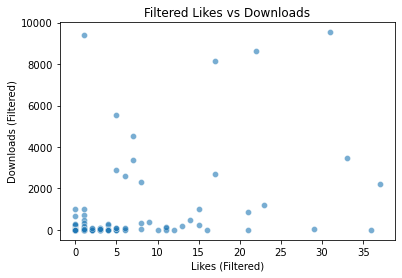

Pearson's Correlation Coefficient: 0.47501267689531357
P-value: 5.767117818602937e-19


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Get the common models between likes_dict and downloads_dict
common_models = set(likes_dict.keys()).intersection(downloads_dict.keys())

# Extract the likes and downloads for the common models
likes = [likes_dict[model] for model in common_models]
downloads = [downloads_dict[model] for model in common_models]

# Calculate 95th percentile values for likes and downloads
likes_threshold = np.percentile(likes, 95)
downloads_threshold = np.percentile(downloads, 95)

# Filter out the data points above the 95th percentile
filtered_likes = [like for like, download in zip(likes, downloads) if like < likes_threshold and download < downloads_threshold]
filtered_downloads = [download for like, download in zip(likes, downloads) if like < likes_threshold and download < downloads_threshold]

# Compute Pearson's Correlation Coefficient for the filtered data
correlation_coefficient = np.corrcoef(filtered_likes, filtered_downloads)[0, 1]
print("Pearson's Correlation Coefficient:", correlation_coefficient)

# Visualization using Scatter Plot for the filtered data
plt.scatter(filtered_likes, filtered_downloads, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.xlabel('Likes (Filtered)')
plt.ylabel('Downloads (Filtered)')
plt.title('Filtered Likes vs Downloads')
plt.show()

from scipy.stats import pearsonr

# Compute the correlation coefficient and p-value for the filtered data
correlation_coefficient, p_value = pearsonr(filtered_likes, filtered_downloads)

print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)



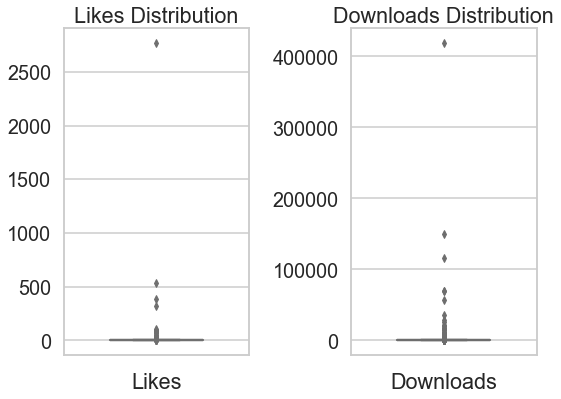

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for professional looking plots
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Setting a font scale and context to make the plot look professional
sns.set_context("talk", font_scale=1.2)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Plotting the box plot for likes with enhanced aesthetics
plt.subplot(1, 2, 1)
sns.boxplot(y=likes, color='skyblue', width=0.5)
plt.title('Likes Distribution')
plt.xlabel('Likes')

# Plotting the box plot for downloads with enhanced aesthetics
plt.subplot(1, 2, 2)
sns.boxplot(y=downloads, color='salmon', width=0.5)
plt.title('Downloads Distribution')
plt.xlabel('Downloads')

# Adjusting space between plots
plt.tight_layout()

# Displaying the plots
plt.show()
